## Initialise

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.container {
    width: 100%;
}
</style>
""")

In [2]:
import graphlab as gl
gl.canvas.set_target('ipynb')
import tools 
import initialise
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

2016-03-16 07:59:56,284 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.4 started. Logging: /tmp/graphlab_server_1458115194.log


This non-commercial license of GraphLab Create is assigned to kevin.mcisaac@gmail.com and will expire on November 06, 2016. For commercial licensing options, visit https://dato.com/buy/.


/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
train_data, test_data = initialise.load_data(reload_data=False)

Loading saved processed data
306  features in total


# Logistic Classifier
- Had to remove rows with "None". Got AUC of 0.667
- Removed low variance features, which made no difference
- Switched to l2_penalty increased AUC to 0.80

In [17]:
train_data_1 = train_data.dropna()
model_1= gl.logistic_classifier.create(train_data_1, target='TARGET', l1_penalty=.05, l2_penalty=0,
                             max_iterations=50)

TypeError: create() got an unexpected keyword argument 'metric'

In [ ]:
model_1.list_fields()

In [5]:
model_1.evaluate(train_data, metric='auc')

{'auc': 0.6669024290928265}

In [6]:
low_variance =['var18 indicator 0', 'var34 indicator 0', 'var18 number 0', 'var34 number 0', 'var18 balance', 'var34 balance', 'var18 amortization amount delta 1Y3', 'var34 amortization amount delta 1Y3', 'var13 refund amount delta 1Y3', 'var33 refund amount delta 1Y3', 'var17 delta transfer amount out 1Y3', 'var33 delta transfer amount out 1Y3', 'var18 repayment amount ultima1', 'var34 repayment amount ultima1', 'var13 refund amount ultima1', 'var17 refund amount ultima1', 'var33 refund amount ultima1', 'var17 transfer amount in ultima1', 'var17 transfer amount out ultima1', 'var33 transfer amount in ultima1', 'var33 transfer amount out ultima1', 'var13 reimbursement number ultima1', 'var17 reimbursement number ultima1', 'var33 reimbursement number ultima1', 'var17 transfer number in ultima1', 'var17 number transfer out ultima1', 'var33 transfer number in ultima1', 'var33 number transfer out ultima1']
print len(low_variance), "low variance features removed"
train_data_2 = train_data.remove_columns(low_variance).dropna()
print len(train_data_2), "vs", len(train_data)

28 low variance features removed
75402 vs 76020


In [7]:
model_2= gl.logistic_classifier.create(train_data_2, target='TARGET', l1_penalty=.05, l2_penalty=0,
                             max_iterations=50)

Logistic regression:

--------------------------------------------------------

Number of examples          : 71658

Number of classes           : 2

Number of feature columns   : 278

Number of unpacked features : 278

Number of coefficients    : 289

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Tuning step size. First iteration could take longer than subsequent iterations.

| 1         | 2        | 0.000002  | 5.588955     | 0.960144          | 0.962340            |

| 2         | 3        | 0.000002  | 6.027737     | 0.960144          | 0.962340            |

| 3         | 4        | 0.000002  | 6.464096     | 0.960144          | 0.962340            |

| 4         | 5        | 0.000002  | 6.905172     | 0.960144          | 0.962340            |

| 5         | 6        | 0.000002  | 7.341538     | 0.960144          | 0.962340            |

| 6         | 7        | 0.000002  | 7.776061     | 0.960144          | 0.962340            |

| 10        | 11       | 0.000002  | 9.521810     | 0.960102          | 0.962073            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [8]:
model_2.evaluate(train_data, metric='auc')

{'auc': 0.6674052109511878}

In [9]:
model_3= gl.logistic_classifier.create(train_data_2, target='TARGET', l1_penalty=.1, l2_penalty=0,
                             max_iterations=50, verbose=False)
model_3.evaluate(train_data, metric='auc')

{'auc': 0.6674639851719227}

In [10]:
model_3= gl.logistic_classifier.create(train_data_2, target='TARGET', l1_penalty=.5, l2_penalty=0,
                             max_iterations=50, verbose=False)
model_3.evaluate(train_data, metric='auc')

{'auc': 0.6669915193006765}

In [11]:
model_4= gl.logistic_classifier.create(train_data_2, target='TARGET', 
                                       l1_penalty=0, l2_penalty=0.1,
                             max_iterations=50, verbose=False)
model_4.evaluate(train_data, metric='auc')

{'auc': 0.8009340456713047}

# Boosted Trees Classifier
Standard pre-preocessing gets an AUC of 0.8384
- depth: 6 auc: 0.8385
- depth: 2 auc: 0.8412
- class weight-auto, depth: 2 auc: 0.8424
- Drop 3 low variance features, no improvement

Looks like depth:4, row: 1.00, col: 0.60, step: 0.10, auc: 0.8465 is place to start

## Remove ID
Make the result slightly worse

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  154  |
|      1       |        1        |  471  |
|      0       |        1        |  3125 |
|      0       |        0        | 11702 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


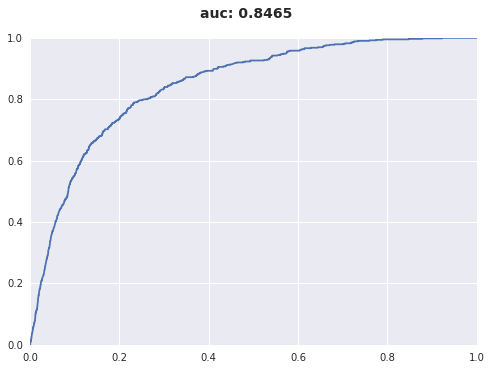

In [145]:
train_data.remove_column('ID');
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  142  |
|      1       |        1        |  483  |
|      0       |        1        |  3286 |
|      0       |        0        | 11541 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


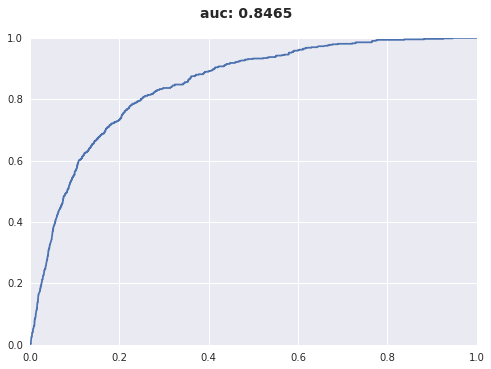

In [142]:
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

In [146]:
model.get_feature_importance()

name,index,count
var38,None,178
var15,None,160
var5 average balancehace3 ...,None,82
var5 average balancehace2 ...,None,70
var5 average balanceultima3 ...,None,69
var30 balance,None,65
var42 balance,None,63
var5 balance,None,43
var5 average balanceultima1 ...,None,41
var22 number ultima3,None,40


## Does removing redundant features help?
Yes by 0.0033

- 'auc': 0.84652  redundant=True,  categorical=True,  clean=True  
- 'auc': 0.84574  redundant=False, categorical=True,  clean=True
- 'auc': 0.84529  redundant=True,  categorical=True,  clean=False
- 'auc': 0.84493  redundant=True,  categorical=False, clean=True
- 'auc': 0.84464  redundant=False, categorical=False, clean=False
- 'auc': 0.84323  redundant=False, categorical=False, clean=True

Improvment from 
- redundant   = {{ (0.84652 - 0.84574) / 0.84652 *100 }}%
- clean       = {{ (0.84652 - 0.84529) / 0.84652 *100}}%
- categorical = {{ (0.84652 - 0.84493 ) /0.84652 *100}}%

In [4]:
train_data, test_data = initialise.load_data(reload_data=True)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='auc')

Loading raw data and tranforming it
Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
306 features in total
Saving processed data for fast reloading
{'auc': 0.8465236123288593}


In [6]:
train_data, test_data = initialise.prepare_data(redundant=False, categorical=True, clean=True)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='auc')

Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
27 features with anomalous values replaced by 'None'
100 integer features converted to categorical
370 features in total
{'auc': 0.8457435759088153}


In [7]:
train_data, test_data = initialise.prepare_data(redundant=False, categorical=False, clean=True)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='auc')

Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
27 features with anomalous values replaced by 'None'
370 features in total
{'auc': 0.8432394955149342}


In [9]:
train_data, test_data = initialise.prepare_data(redundant=True, categorical=True, clean=False)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='auc')

Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
73 integer features converted to categorical
306 features in total
{'auc': 0.8452934781142514}


In [10]:
train_data, test_data = initialise.prepare_data(redundant=False, categorical=False, clean=False)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='auc')

Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
370 features in total
{'auc': 0.8446488163485494}


In [11]:
train_data, test_data = initialise.prepare_data(redundant=True, categorical=False, clean=True)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='auc')

Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
306 features in total
{'auc': 0.8449307884265228}


## Optimised parameters


## Parameter sets from discussion

validation auc 0.844860

In [17]:
#xgb.XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=4242)
#taken from a discussion thread
train_data, test_data = initialise.load_data(reload_data=False)
train, validate = train_data.random_split(0.8, seed=8273)

params = {'target':'TARGET', 'random_seed':4242,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':500,
          'step_size': 0.03,
          'max_depth': 5,
          'row_subsample': 0.95,
          'column_subsample': 0.85}

            
model = gl.boosted_trees_classifier.create(train,validation_set=validate, **params)
tools.plot_metric(model)
print "model.validation_auc", model.validation_auc

Loading saved processed data
306

WARNING: Detected extremely low variance for feature(s) 'var33 delta transfer amount out 1Y3', 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 306

Number of unpacked features : 306

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 2.529215     | 0.831203     | 0.817351       |

| 2         | 4.950675     | 0.828493     | 0.816365       |

| 3         | 5.757543     | 0.827821     | 0.810584       |

| 4         | 6.560791     | 0.837370     | 0.823226       |

| 5         | 7.253640     | 0.843116     | 0.828061       |

| 6         | 7.953820     | 0.840475     | 0.824868       |

| 7         | 8.837209     | 0.843555     | 0.827581       |

| 8         | 9.587782     | 0.845429     | 0.829759       |

| 9         | 10.374729    | 0.847088     | 0.831963       |

| 10        | 11.121935    | 0.848237     | 0.833612       |

| 11        | 11.804880    | 0.848623     | 0.833758       |

| 12        | 12.564172    | 0.849143     | 0.834673       |

| 13        | 13.376320    | 0.849491     | 0.834553       |

| 14        | 14.042869    | 0.849678     | 0.834909       |

| 15        | 14.792137    | 0.849861     | 0.834931       |

| 16        | 15.477739    | 0.849903     | 0.835074       |

| 17        | 16.402411    | 0.849927     | 0.835386       |

| 18        | 17.269555    | 0.850670     | 0.835560       |

| 19        | 18.114974    | 0.850907     | 0.836248       |

| 20        | 19.001775    | 0.851475     | 0.836777       |

| 21        | 19.893157    | 0.851856     | 0.836893       |

| 22        | 20.659520    | 0.852159     | 0.836909       |

| 23        | 21.368009    | 0.852351     | 0.837208       |

| 24        | 22.089762    | 0.852926     | 0.837763       |

| 25        | 22.862579    | 0.853143     | 0.837964       |

| 26        | 23.609708    | 0.853257     | 0.838498       |

| 27        | 24.313411    | 0.853525     | 0.839038       |

| 28        | 25.150250    | 0.853596     | 0.839286       |

| 29        | 25.865313    | 0.853939     | 0.839373       |

| 30        | 27.393238    | 0.854459     | 0.839737       |

| 31        | 28.208296    | 0.854500     | 0.839962       |

| 32        | 29.025296    | 0.854829     | 0.839504       |

| 33        | 29.807731    | 0.855010     | 0.839785       |

| 34        | 30.647169    | 0.855310     | 0.839876       |

| 35        | 31.433929    | 0.855597     | 0.840124       |

| 36        | 32.151242    | 0.855731     | 0.840241       |

| 37        | 32.905732    | 0.855883     | 0.840373       |

| 38        | 33.708530    | 0.856133     | 0.840555       |

| 39        | 34.513944    | 0.856338     | 0.840711       |

| 40        | 35.281844    | 0.856685     | 0.840733       |

| 41        | 35.902847    | 0.856979     | 0.841052       |

| 42        | 36.681739    | 0.857241     | 0.840920       |

| 43        | 37.501845    | 0.857812     | 0.841114       |

| 44        | 38.313862    | 0.858057     | 0.841208       |

| 45        | 39.095947    | 0.858121     | 0.841480       |

| 46        | 39.879326    | 0.858491     | 0.841515       |

| 47        | 40.694235    | 0.858626     | 0.841478       |

| 48        | 41.444858    | 0.858971     | 0.841641       |

| 49        | 42.036940    | 0.859231     | 0.841620       |

| 50        | 42.845783    | 0.859400     | 0.841761       |

| 51        | 43.639802    | 0.859780     | 0.841685       |

| 52        | 44.370478    | 0.859908     | 0.841757       |

| 53        | 45.202414    | 0.859986     | 0.841884       |

| 54        | 45.985847    | 0.860195     | 0.842051       |

| 55        | 46.789579    | 0.860335     | 0.842066       |

| 56        | 47.478958    | 0.860630     | 0.842111       |

| 57        | 48.220996    | 0.860704     | 0.842086       |

| 58        | 48.993218    | 0.860924     | 0.842118       |

| 59        | 49.785840    | 0.861178     | 0.842201       |

| 60        | 50.477092    | 0.861339     | 0.842252       |

| 61        | 51.253630    | 0.861651     | 0.842186       |

| 62        | 52.077615    | 0.862168     | 0.842225       |

| 63        | 52.829450    | 0.862338     | 0.842432       |

| 64        | 53.653952    | 0.862486     | 0.842587       |

| 65        | 54.253959    | 0.862667     | 0.842648       |

| 66        | 55.045991    | 0.862882     | 0.842577       |

| 67        | 55.906886    | 0.863016     | 0.842522       |

| 68        | 56.638583    | 0.863136     | 0.842659       |

| 69        | 57.391999    | 0.863355     | 0.842612       |

| 70        | 58.166016    | 0.863481     | 0.842613       |

| 71        | 59.029501    | 0.863637     | 0.842547       |

| 72        | 59.764010    | 0.863883     | 0.842505       |

| 73        | 60.545629    | 0.864035     | 0.842588       |

| 74        | 61.335052    | 0.864261     | 0.842564       |

| 75        | 62.189610    | 0.864435     | 0.842647       |

| 76        | 62.922579    | 0.864576     | 0.842722       |

| 77        | 63.624066    | 0.864928     | 0.842865       |

| 78        | 64.441469    | 0.865173     | 0.842962       |

| 79        | 65.297395    | 0.865342     | 0.843140       |

| 80        | 66.064685    | 0.865454     | 0.843077       |

| 81        | 66.786660    | 0.865610     | 0.843238       |

| 82        | 67.502764    | 0.865755     | 0.843336       |

| 83        | 68.454415    | 0.866065     | 0.843333       |

| 84        | 69.105699    | 0.866293     | 0.843407       |

| 85        | 69.810884    | 0.866451     | 0.843512       |

| 86        | 70.646089    | 0.866636     | 0.843638       |

| 87        | 71.333399    | 0.866773     | 0.843720       |

| 88        | 71.978026    | 0.867008     | 0.843730       |

| 89        | 72.698317    | 0.867262     | 0.843709       |

| 90        | 73.384168    | 0.867479     | 0.843634       |

| 91        | 74.266065    | 0.867586     | 0.843605       |

| 92        | 75.140399    | 0.867884     | 0.843668       |

| 93        | 75.841123    | 0.868089     | 0.843760       |

| 94        | 76.676248    | 0.868335     | 0.843869       |

| 95        | 77.457263    | 0.868418     | 0.843915       |

| 96        | 78.270366    | 0.868676     | 0.843904       |

| 97        | 78.914697    | 0.868883     | 0.844014       |

| 98        | 81.978286    | 0.869002     | 0.843959       |

| 99        | 82.635985    | 0.869213     | 0.843972       |

| 100       | 83.190383    | 0.869420     | 0.844032       |

| 101       | 83.728045    | 0.869570     | 0.844093       |

| 102       | 84.528859    | 0.869772     | 0.844144       |

| 103       | 85.339046    | 0.869935     | 0.844022       |

| 104       | 86.181888    | 0.870065     | 0.844034       |

| 105       | 87.142083    | 0.870195     | 0.843956       |

| 106       | 88.051953    | 0.870447     | 0.843951       |

| 107       | 88.872146    | 0.870542     | 0.843941       |

| 108       | 89.461823    | 0.870729     | 0.843989       |

| 109       | 90.116864    | 0.870897     | 0.844013       |

| 110       | 90.826006    | 0.871081     | 0.843993       |

| 111       | 91.685923    | 0.871244     | 0.843969       |

| 112       | 92.517508    | 0.871370     | 0.844020       |

| 113       | 93.365892    | 0.871571     | 0.844107       |

| 114       | 94.202148    | 0.871744     | 0.844174       |

| 115       | 95.134370    | 0.871959     | 0.844225       |

| 116       | 95.930621    | 0.872094     | 0.844274       |

| 117       | 96.722040    | 0.872184     | 0.844231       |

| 118       | 97.524447    | 0.872303     | 0.844280       |

| 119       | 98.277090    | 0.872424     | 0.844294       |

| 120       | 99.128240    | 0.872602     | 0.844362       |

| 121       | 99.890163    | 0.872716     | 0.844388       |

| 122       | 100.672830   | 0.872911     | 0.844368       |

| 123       | 101.499451   | 0.873020     | 0.844358       |

| 124       | 102.349558   | 0.873184     | 0.844298       |

| 125       | 103.134806   | 0.873380     | 0.844340       |

| 126       | 103.895002   | 0.873510     | 0.844337       |

| 127       | 104.669309   | 0.873699     | 0.844370       |

| 128       | 105.509672   | 0.873853     | 0.844368       |

| 129       | 106.375097   | 0.874051     | 0.844290       |

| 130       | 107.006731   | 0.874260     | 0.844324       |

| 131       | 107.695001   | 0.874359     | 0.844381       |

| 132       | 108.489352   | 0.874467     | 0.844367       |

| 133       | 109.296442   | 0.874557     | 0.844382       |

| 134       | 110.086728   | 0.874709     | 0.844409       |

| 135       | 110.893431   | 0.874882     | 0.844406       |

| 136       | 111.636302   | 0.875038     | 0.844351       |

| 137       | 112.380937   | 0.875225     | 0.844343       |

| 138       | 113.177287   | 0.875414     | 0.844387       |

| 139       | 113.917017   | 0.875570     | 0.844474       |

| 140       | 114.634431   | 0.875661     | 0.844501       |

| 141       | 115.493867   | 0.875809     | 0.844504       |

| 142       | 116.345643   | 0.875931     | 0.844420       |

| 143       | 117.146364   | 0.876093     | 0.844436       |

| 144       | 117.952467   | 0.876310     | 0.844538       |

| 145       | 118.725070   | 0.876451     | 0.844504       |

| 146       | 119.485193   | 0.876603     | 0.844505       |

| 147       | 120.198889   | 0.876685     | 0.844510       |

| 148       | 120.983998   | 0.876767     | 0.844525       |

| 149       | 121.834135   | 0.876894     | 0.844548       |

| 150       | 122.527260   | 0.877042     | 0.844577       |

| 151       | 123.273242   | 0.877147     | 0.844622       |

| 152       | 124.157874   | 0.877266     | 0.844611       |

| 153       | 124.850990   | 0.877316     | 0.844644       |

| 154       | 125.560437   | 0.877441     | 0.844693       |

| 155       | 126.254983   | 0.877592     | 0.844705       |

| 156       | 127.032515   | 0.877634     | 0.844717       |

| 157       | 127.764852   | 0.877763     | 0.844733       |

| 158       | 128.480464   | 0.877845     | 0.844727       |

| 159       | 129.248164   | 0.878016     | 0.844760       |

| 160       | 130.026354   | 0.878094     | 0.844756       |

| 161       | 130.763608   | 0.878277     | 0.844681       |

| 162       | 131.574865   | 0.878499     | 0.844731       |

| 163       | 132.388115   | 0.878653     | 0.844738       |

| 164       | 133.282088   | 0.878829     | 0.844835       |

| 165       | 134.132087   | 0.878965     | 0.844827       |

| 166       | 135.060637   | 0.879103     | 0.844860       |

| 167       | 135.912411   | 0.879275     | 0.844820       |

| 168       | 136.577156   | 0.879342     | 0.844808       |

| 169       | 137.310763   | 0.879465     | 0.844729       |

| 170       | 137.993974   | 0.879639     | 0.844725       |

| 171       | 138.721745   | 0.879712     | 0.844733       |

| 172       | 139.517683   | 0.879815     | 0.844642       |

| 173       | 140.329879   | 0.879949     | 0.844645       |

| 174       | 141.171128   | 0.880227     | 0.844538       |

| 175       | 141.942686   | 0.880305     | 0.844572       |

| 176       | 142.713956   | 0.880409     | 0.844548       |

| 177       | 143.522004   | 0.880543     | 0.844582       |

| 178       | 144.238490   | 0.880603     | 0.844657       |

| 179       | 145.014941   | 0.880695     | 0.844653       |

| 180       | 145.879146   | 0.880821     | 0.844593       |

| 181       | 146.676583   | 0.880962     | 0.844586       |

| 182       | 147.569489   | 0.881008     | 0.844570       |

| 183       | 148.321723   | 0.881094     | 0.844563       |

| 184       | 149.161529   | 0.881127     | 0.844543       |

| 185       | 149.977754   | 0.881251     | 0.844582       |

| 186       | 150.720240   | 0.881293     | 0.844577       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 166

  features in total


Class                         : BoostedTreesClassifier

Schema
------
Number of examples            : 60568
Number of feature columns     : 306
Number of unpacked features   : 306
Number of classes             : 2

Settings
--------
Number of trees               : 166
Max tree depth                : 5
Training time (sec)           : 150.7223
Training auc                  : 0.8791
Validation auc                : 0.8449

<module 'matplotlib.pyplot' from '/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

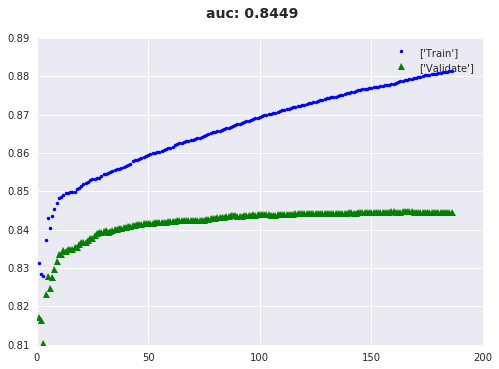

# Other variations

## Stratified split
Gave a slighly lower validation 'auc': 0.83822 vs 0.84244

In [6]:
train_data, test_data = initialise.load_data(reload_data=False)
reload(tools)
train, validate = tools.stratified_split(train_data, 'TARGET', 0.8, seed=8273)

params = {'target':'TARGET', 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':500,
          'step_size': 0.1,
          'max_depth': 5,
          'column_subsample': 0.6}
model = gl.boosted_trees_classifier.create(train, validation=validate, verbose=False, **params)
model.evaluate(validate, metric='auc')

Loading saved processed data
306  features in total


{'auc': 0.8382299326357934}

In [7]:
train_data, test_data = initialise.load_data(reload_data=False)
train, validate = train_data.random_split(0.8, seed=8273)

params = {'target':'TARGET', 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':500,
          'step_size': 0.1,
          'max_depth': 5,
          'column_subsample': 0.6}
model = gl.boosted_trees_classifier.create(train, validation=validate, verbose=False, **params)
model.evaluate(validate, metric='auc')


Loading saved processed data
306  features in total


{'auc': 0.8424470493019368}

## PCA
Apply PCA to numerical variables (i.e., floats).Pair plots show a structure, a grouping around axes but using this as part of a GBT got a slighly worse result of AUC 0.8305

In [12]:
params

{'class_weights': 'auto',
 'early_stopping_rounds': 20,
 'max_depth': [2, 3, 4, 5, 6, 7],
 'max_iterations': 400,
 'metric': 'auc',
 'random_seed': 8923,
 'step_size': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fbbfc39c6d0>,
 'target': 'TARGET'}

In [12]:
import numpy as np
import pandas as pd

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [20]:
reload(initialise)
train_data, test_data = initialise.load_data(reload_data=True)

Loading raw data and tranforming it
Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
306 features in total
Saving processed data for fast reloading


In [17]:
reload(tools)
np_array, variance = tools.PCA_sf(train_data[tools.features_type(float(), train_data)])
len(variance)

43

In [22]:
df=pd.DataFrame(np_array)
df['TARGET']=train_data['TARGET']

/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


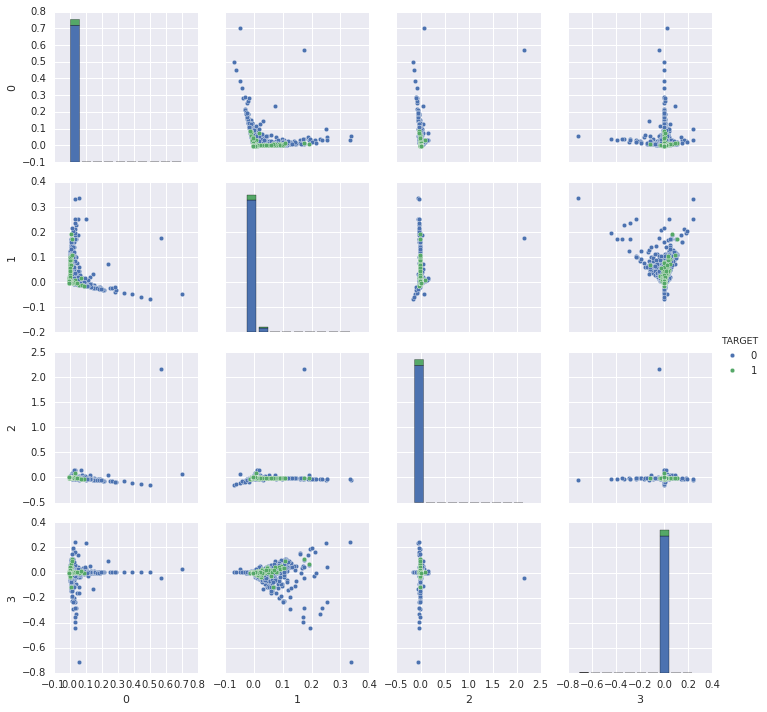

In [23]:
sns.pairplot(df, hue="TARGET", vars=range(0,4))

In [ ]:
df[0:3]

ERROR! Session/line number was not unique in database. History logging moved to new session 504


KeyboardInterrupt: 

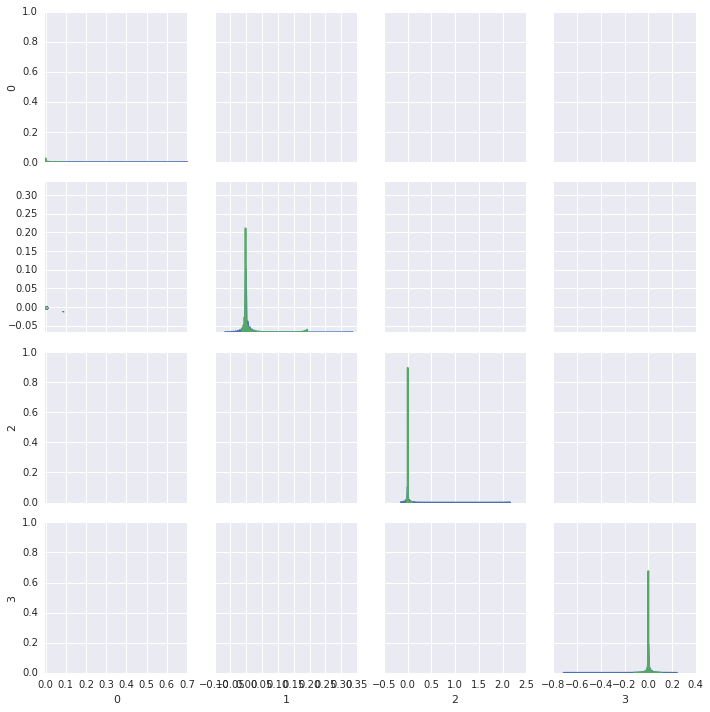

In [38]:
g = sns.PairGrid(df,hue="TARGET",vars=range(0,4))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

### Modeling
For 
- GBT AUC slighlty reduced to 0.8305
- Logistic classifer 'auc': 0.79

In [97]:
tf_train_data = gl.SFrame(data=pd.DataFrame(np))
tf_train_data["TARGET"] = train_data["TARGET"]

In [98]:
train, validate = tf_train_data.random_split(0.8, seed=8273)

In [99]:
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
#d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
#                    max_depth=d, row_subsample=r, column_subsample=c, step_size=s, 
                                           **params)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 43

Number of unpacked features : 43

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.163370     | 0.559832     | 0.542786       |

| 2         | 0.289641     | 0.565165     | 0.548414       |

| 3         | 0.420943     | 0.568061     | 0.549700       |

| 4         | 0.547733     | 0.570385     | 0.550027       |

| 5         | 0.672248     | 0.578567     | 0.554003       |

| 6         | 0.795610     | 0.578720     | 0.556062       |

| 10        | 1.285778     | 0.590282     | 0.560761       |

| 11        | 1.405625     | 0.592942     | 0.558861       |

| 20        | 2.499544     | 0.606602     | 0.555676       |

| 30        | 3.745121     | 0.620406     | 0.556344       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 10

In [102]:
tf_train_data = gl.SFrame(data=pd.DataFrame(np))
cols = tools.features_type(int(), train_data) | tools.features_type(str(), train_data)
tf_train_data.add_columns(train_data[cols])
train, validate = tf_train_data.random_split(0.8, seed=8273)

In [109]:
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, step_size=s, 
                                           **params)

WARNING: Detected extremely low variance for feature(s) 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1', 'var33 delta transfer amount out 1Y3' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 306

Number of unpacked features : 306

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.319230     | 0.797627     | 0.795356       |

| 2         | 0.580175     | 0.799069     | 0.791257       |

| 3         | 0.832600     | 0.813973     | 0.811350       |

| 4         | 1.086461     | 0.808702     | 0.806060       |

| 5         | 1.351753     | 0.813319     | 0.809736       |

| 6         | 1.602675     | 0.816180     | 0.812598       |

| 10        | 2.610437     | 0.820622     | 0.816861       |

| 11        | 2.864209     | 0.821714     | 0.817754       |

| 15        | 3.889818     | 0.825261     | 0.820294       |

| 20        | 5.160241     | 0.828728     | 0.822572       |

| 25        | 6.445507     | 0.832235     | 0.826048       |

| 30        | 7.724334     | 0.834751     | 0.826816       |

| 35        | 8.985066     | 0.837184     | 0.828331       |

| 40        | 10.237130    | 0.839575     | 0.828947       |

| 45        | 11.529001    | 0.841793     | 0.829707       |

| 50        | 12.781832    | 0.843696     | 0.829791       |

| 51        | 13.039565    | 0.843960     | 0.829698       |

| 55        | 14.043899    | 0.845263     | 0.829930       |

| 60        | 15.303194    | 0.846522     | 0.829863       |

| 65        | 16.575642    | 0.847571     | 0.829910       |

| 70        | 17.863582    | 0.848898     | 0.830133       |

| 75        | 19.138148    | 0.850420     | 0.830446       |

| 80        | 20.400531    | 0.851146     | 0.830274       |

| 85        | 21.673374    | 0.852234     | 0.830381       |

| 90        | 22.955303    | 0.853396     | 0.830458       |

| 95        | 24.229448    | 0.854172     | 0.830272       |

| 100       | 25.499908    | 0.855311     | 0.830242       |

| 101       | 25.748575    | 0.855593     | 0.830280       |

| 105       | 26.760043    | 0.856163     | 0.829822       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 89

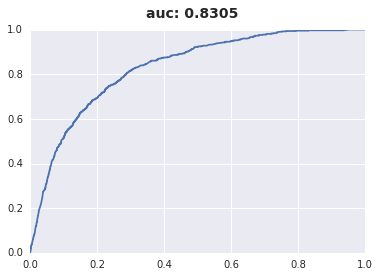

In [110]:
tools.plot_roc(model, validate);

In [112]:
model= gl.logistic_classifier.create(train.dropna(), target='TARGET', 
                                       l1_penalty=0, l2_penalty=0.1,
                             max_iterations=50, validate=validate)
model.evaluate(train_data, metric='auc')
# 'auc': 0.79

WARNING: Detected extremely low variance for feature(s) 'var33 refund amount delta 1Y3', 'var17 transfer number in ultima1', 'var17 delta transfer amount out 1Y3', 'ventidada delta amount var44 1Y3', 'var17 number transfer out ultima1', 'var34 indicator 0', 'var33 transfer number in ultima1', 'var18 repayment amount ultima1', 'var13 number months average number ultima3', 'var34 number 0', 'var13 average number 0', 'var18 number 0', 'var18 balance', 'var33 refund amount ultima1', 'var13 refund amount delta 1Y3', 'var33 reimbursement number ultima1', 'var17 refund amount ultima1', 'var13 indicator means 0', 'var33 transfer amount out ultima1', 'var17 transfer amount out ultima1', 'var34 balance', 'var13 average balance means hace2', 'var33 transfer amount in ultima1', 'var13 refund amount ultima1', 'var34 amortization amount delta 1Y3', 'var13 reimbursement number ultima1', 'var33 number transfer out ultima1', 'var44 delta ventidada number 1Y3', 'var13 balance means', 'var18 amortization amount delta 1Y3', 'var17 transfer amount in ultima1', 'var33 delta transfer amount out 1Y3', 'var17 reimbursement number ultima1', 'var18 indicator 0', 'var34 repayment amount ultima1', 'var13 average balance means ultima3' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Logistic regression:

--------------------------------------------------------

Number of examples          : 57037

Number of classes           : 2

Number of feature columns   : 306

Number of unpacked features : 306

Number of coefficients    : 302

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 22.737472    | 0.960552          | 0.959881            |

| 2         | 3        | 34.124204    | 0.960517          | 0.959881            |

| 3         | 4        | 45.544323    | 0.960517          | 0.959881            |

| 4         | 5        | 56.973145    | 0.960429          | 0.959549            |

| 5         | 6        | 68.377275    | 0.960377          | 0.959218            |

| 6         | 7        | 79.788784    | 0.960342          | 0.959881            |

| 7         | 8        | 91.210079    | 0.960342          | 0.959881            |

| 8         | 9        | 102.685338   | 0.960342          | 0.959549            |

| 9         | 10       | 114.091003   | 0.960342          | 0.959549            |

| 10        | 11       | 125.510017   | 0.960342          | 0.959549            |

| 11        | 12       | 136.966494   | 0.960342          | 0.959549            |

| 12        | 13       | 148.548243   | 0.960342          | 0.959881            |

| 13        | 14       | 159.954490   | 0.960342          | 0.959881            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



{'auc': 0.7908527938171901}

In [115]:
model= gl.svm_classifier.create(train.dropna(), target='TARGET', max_iterations = 100)
model.evaluate(train_data, metric='auc')
# 'auc': 0.79

WARNING: Detected extremely low variance for feature(s) 'var33 refund amount delta 1Y3', 'var17 refund amount hace3', 'var17 transfer number in ultima1', 'var17 delta transfer amount out 1Y3', 'var17 number transfer out ultima1', 'var34 indicator 0', 'var33 transfer number in ultima1', 'var18 repayment amount ultima1', 'var34 number 0', 'var18 number 0', 'var18 balance', 'var33 refund amount ultima1', 'var13 refund amount delta 1Y3', 'var33 reimbursement number ultima1', 'var17 refund amount ultima1', 'var33 transfer amount out ultima1', 'var17 transfer amount out ultima1', 'var34 balance', 'var33 transfer amount in ultima1', 'var13 refund amount ultima1', 'var34 amortization amount delta 1Y3', 'var17 refund amount delta 1Y3', 'var13 reimbursement number ultima1', 'var33 number transfer out ultima1', 'var18 amortization amount delta 1Y3', 'var17 transfer amount in ultima1', 'var33 delta transfer amount out 1Y3', 'var17 reimbursement number ultima1', 'var18 indicator 0', 'var34 repayment amount ultima1', 'var17 reimbursement number hace3' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

SVM:

--------------------------------------------------------

Number of examples          : 56878

Number of classes           : 2

Number of feature columns   : 306

Number of unpacked features : 306

Number of coefficients    : 305

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000018  | 0.472293     | 0.960424          | 0.961575            |

| 2         | 11       | 18.210937 | 1.871838     | 0.958174          | 0.960000            |

| 3         | 12       | 18.210937 | 2.175838     | 0.085323          | 0.085669            |

| 4         | 14       | 1.000000  | 2.633695     | 0.787299          | 0.788661            |

| 5         | 15       | 1.000000  | 2.938058     | 0.874820          | 0.874016            |

| 6         | 17       | 1.000000  | 3.399618     | 0.960336          | 0.961260            |

| 10        | 22       | 1.000000  | 4.761094     | 0.577007          | 0.579528            |

| 11        | 24       | 1.000000  | 5.216739     | 0.886617          | 0.882520            |

| 15        | 32       | 0.065086  | 7.043753     | 0.124178          | 0.124724            |

| 20        | 40       | 1.000000  | 9.032735     | 0.860614          | 0.849764            |

| 25        | 46       | 1.000000  | 10.701793    | 0.957400          | 0.959370            |

| 30        | 53       | 1.000000  | 12.529011    | 0.299800          | 0.298898            |

| 35        | 64       | 1.000000  | 14.989836    | 0.952917          | 0.954016            |

| 40        | 71       | 1.000000  | 16.821126    | 0.956187          | 0.957795            |

| 45        | 78       | 1.000000  | 18.646373    | 0.958314          | 0.960000            |

| 50        | 85       | 1.000000  | 20.462725    | 0.959440          | 0.961260            |

| 51        | 86       | 1.000000  | 20.765243    | 0.090000          | 0.089134            |

| 55        | 92       | 1.000000  | 22.290877    | 0.908734          | 0.911496            |

| 60        | 100      | 1.000000  | 24.277543    | 0.957980          | 0.956220            |

| 65        | 107      | 1.000000  | 26.101389    | 0.944390          | 0.944882            |

| 70        | 114      | 1.000000  | 27.929269    | 0.948486          | 0.948976            |

| 75        | 120      | 1.000000  | 29.596034    | 0.939766          | 0.943622            |

| 80        | 126      | 1.000000  | 31.266578    | 0.885632          | 0.884094            |

| 85        | 134      | 0.500000  | 33.253661    | 0.388252          | 0.382047            |

| 90        | 141      | 1.000000  | 35.077654    | 0.812423          | 0.820787            |

| 95        | 148      | 1.000000  | 36.902738    | 0.456873          | 0.461732            |

| 100       | 155      | 1.000000  | 38.725835    | 0.959018          | 0.960000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



ToolkitError: Evaluation metric 'auc' not recognized. The supported evaluation metrics are ('auto', 'accuracy', 'confusion_matrix', 'precision', 'recall', 'f1_score').

## Quadratics
No benefits

### Products of numberical data (i.e., floats())

Results in a very poor score, auc: 0.501263  

In [4]:
train_data, test_data = initialise.load_data(reload_data=False)

Loading saved processed data
306  features in total


In [7]:
from graphlab.toolkits.feature_engineering import *
numeric_cols = list(tools.features_type(float(), train_data))

qf = QuadraticFeatures(features= numeric_cols,
                  output_column_name="QN")

quadratic = gl.feature_engineering.create(train_data,qf)

train_data = quadratic.transform(train_data)
#test_data = quadratic.transform(test_data)

train, validate = train_data.random_split(0.8, seed=8273)

In [ ]:
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
#          'max_depth':4, 'row_subsample':1, 'column_subsample'=1, 'step_size':0.3}


model = gl.boosted_trees_classifier.create(train, **params)

In [ ]:
reload(tools)
tools.plot_roc(model, validate);

### Ordinal Data

Seem like this is too large a transformation

In [4]:
train_data, test_data = initialise.load_data(reload_data=False)

Loading saved processed data
306  features in total


In [5]:
int_cols = list(tools.features_type(int(), train_data))

from graphlab.toolkits.feature_engineering import *
qf = QuadraticFeatures(features= int_cols, output_column_name="QI")
quadratic = gl.feature_engineering.create(train_data,qf)
train_data = quadratic.transform(train_data)
#test_data = quadratic.transform(test_data)

train, validate = train_data.random_split(0.8, seed=8273)

191

In [10]:
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
#          'max_depth':4, 'row_subsample':1, 'column_subsample'=1, 'step_size':0.3}


model = gl.boosted_trees_classifier.create(train, **params)

IOError: Fail to write. Disk may be full.

In [ ]:
reload(tools)
tools.plot_roc(model, validate);

# Inspect most important variables.


WARNING: Detected extremely low variance for feature(s) 'var33 delta transfer amount out 1Y3', 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 306

Number of unpacked features : 306

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.229299     | 0.820057     | 0.820064       |

| 2         | 0.404783     | 0.827293     | 0.827227       |

| 3         | 0.588198     | 0.829357     | 0.827584       |

| 4         | 0.765628     | 0.834063     | 0.830770       |

| 5         | 0.945578     | 0.836802     | 0.832260       |

| 6         | 1.128756     | 0.836398     | 0.830956       |

| 10        | 1.853880     | 0.842514     | 0.836543       |

| 11        | 2.041405     | 0.843680     | 0.837302       |

| 20        | 3.722999     | 0.850309     | 0.840667       |

| 30        | 5.589960     | 0.855640     | 0.843102       |

| 40        | 7.441953     | 0.859954     | 0.844236       |

| 50        | 9.319683     | 0.863559     | 0.844840       |

| 51        | 9.525965     | 0.864025     | 0.844999       |

| 60        | 11.186108    | 0.866464     | 0.845110       |

| 70        | 13.007408    | 0.868462     | 0.845052       |

| 80        | 14.851962    | 0.870623     | 0.844900       |

| 90        | 16.715817    | 0.872021     | 0.845067       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 71

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  146  |
|      1       |        1        |  479  |
|      0       |        1        |  3220 |
|      0       |        0        | 11607 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


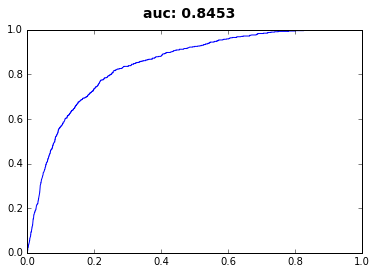

In [4]:
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

In [5]:
model.get_feature_importance()

name,index,count
var38,None,105
var15,None,104
ID,None,61
var30 balance,None,55
var5 average balancehace3 ...,None,52
var5 average balancehace2 ...,None,44
var5 average balanceultima3 ...,None,37
var42 balance,None,31
var45 number hace3,None,26
var22 number ultima1,None,26


In [6]:
import numpy as np
import pandas as pd
%matplotlib inline


/home/ec2-user/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## var38
- Mode accounts for {{"{:.1%}".format(14868/76020.)}} of the data
- Removing mode and taking a log, it looks normally distributed

In [63]:
train_data['var38'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     76020     |   Yes    |
|        Min         |    5163.75    |   Yes    |
|        Max         |  22034738.76  |   Yes    |
|        Mean        |  117235.80943 |   Yes    |
|        Sum         |  8912266232.9 |   Yes    |
|      Variance      | 33365916630.7 |   Yes    |
| Standard Deviation | 182663.397074 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |     57940     |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+---------------+-----------+-----------+-----------+----------+-----------+
| value | 117310.979016 | 451931.22 | 463625.16 | 288997.44 | 104563.8 | 236690.34 |
+-------+---------------+-----------+-----------+-----------+----------+-----------+
| count |     14868     |     16    |     12    |     11    |    11    |

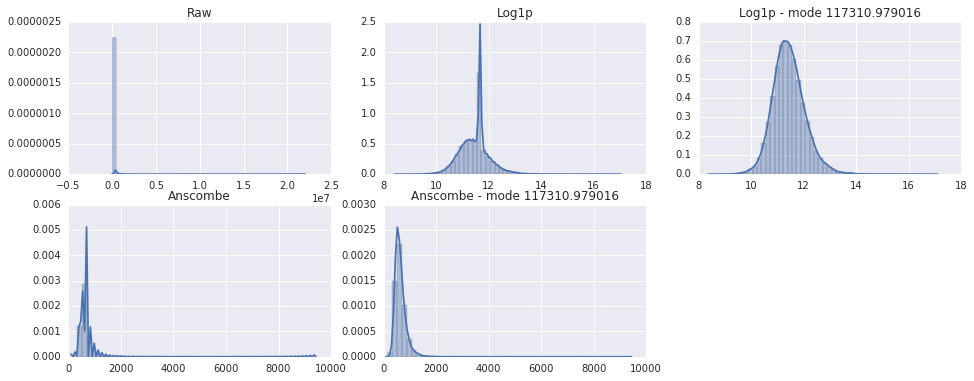

In [9]:
# plot distributions
from math import log1p, sqrt
sns.set("notebook")
plt.figure(figsize=(16, 6))
sa = train_data['var38']
mode=tools.mode_sa(sa)

plt.subplot(2, 3, 1)
plt.title('Raw')
sns.distplot(sa)

plt.subplot(2, 3, 2)
plt.title('Log1p')
sns.distplot(sa.apply(log1p))

plt.subplot(2, 3, 3)
plt.title('Log1p - mode ' +  str(mode))
sns.distplot(sa.filter(lambda x: x != mode).apply(log1p))

plt.subplot(2, 3, 4)
plt.title('Anscombe')
sns.distplot(sa.apply(lambda x: 2*sqrt(x +3/8.0)))

plt.subplot(2, 3, 5)
plt.title('Anscombe - mode ' +  str(mode))
sns.distplot(sa.filter(lambda x: x != mode).apply(lambda x: 2*sqrt(x +3/8.0)))

## var15
- Mode of 23 accounts for {{"{:.1%}".format(20170/76020.)}} of the data
- after taking log it looks like two normal distributions, one around themode, the other around 40

In [91]:
train_data['var15'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     76020     |   Yes    |
|        Min         |      5.0      |   Yes    |
|        Max         |     105.0     |   Yes    |
|        Mean        | 33.2128650355 |   Yes    |
|        Sum         |   2524842.0   |   Yes    |
|      Variance      | 167.868316469 |   Yes    |
| Standard Deviation | 12.9564005985 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      100      |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+------+------+------+------+------+------+------+------+------+
| value |   23  |  24  |  25  |  26  |  27  |  28  |  31  |  29  |  30  |  32  |
+-------+-------+------+------+------+------+------+------+------+------+------+
| count | 20170 | 6232 | 4217 | 3270 | 2861 | 2173 | 1798 | 1727 | 1640 | 1592 |
+--

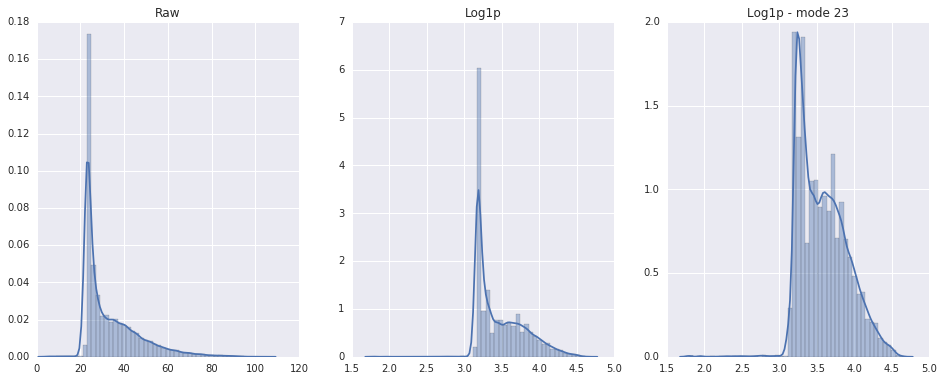

In [8]:
# plot distributions
from math import log1p
sns.set("notebook")
plt.figure(figsize=(16, 6))
sa = train_data['var15']
mode=tools.mode_sa(sa)
plt.subplot(1, 3, 1)
plt.title('Raw')
sns.distplot(sa)
plt.subplot(1, 3, 2)
plt.title('Log1p')
sns.distplot(sa.apply(log1p))
plt.subplot(1, 3, 3)
plt.title('Log1p - mode ' +  str(mode))
sns.distplot(sa.filter(lambda x: x != mode).apply(log1p))

## var30 balance
- Nothing particularly interesting

In [127]:
train_data['var30 balance'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     76020     |   Yes    |
|        Min         |    -4942.26   |   Yes    |
|        Max         |   3458077.32  |   Yes    |
|        Mean        | 13679.6736582 |   Yes    |
|        Sum         |  1039928791.5 |   Yes    |
|      Variance      | 3970721810.85 |   Yes    |
| Standard Deviation | 63013.6636838 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |     16992     |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+-------+------+------+------+-----+-------+------+-------+-------+
| value |  0.0  |  3.0  | 90.0 | 30.0 | 15.0 | 6.0 | 150.0 | 60.0 | 300.0 | 120.0 |
+-------+-------+-------+------+------+------+-----+-------+------+-------+-------+
| count | 20310 | 18290 | 5236 | 1603 | 1477 | 926 |  823  | 686  |  400  |

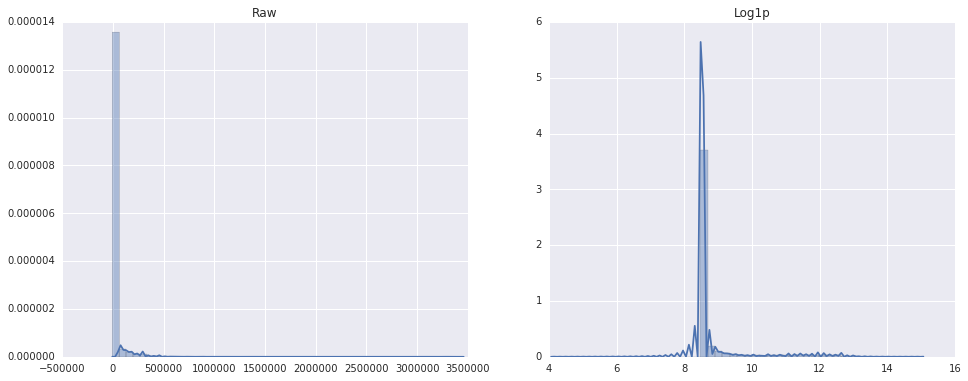

In [131]:
# plot distributions
from math import log1p
sns.set("notebook")
plt.figure(figsize=(16, 6))
sa = train_data['var30 balance']
plt.subplot(1, 2, 1)
plt.title('Raw')
sns.distplot(sa)
plt.subplot(1, 2, 2)
plt.title('Log1p')
sns.distplot(sa.apply(lambda x: log1p(x + 5000)))

## var5 average balance hace3
- Nothing particularly interesting

In [132]:
train_data['var5 average balance hace3'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     76020     |   Yes    |
|        Min         |     -8.04     |   Yes    |
|        Max         |   1542339.36  |   Yes    |
|        Mean        | 891.365863457 |   Yes    |
|        Sum         |  67761632.94  |   Yes    |
|      Variance      | 97783064.3257 |   Yes    |
| Standard Deviation | 9888.53196009 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      7787     |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+-------+------+------+------+------+------+------+-----+------+------+
| value |  0.0  | 0.09 | 0.18 | 0.99 | 2.61 | 0.27 | 2.55 | 2.4 | 0.51 | 1.05 |
+-------+-------+------+------+------+------+------+------+-----+------+------+
| count | 29637 | 992  | 875  | 741  | 703  | 629  | 600  | 583 | 576  | 564  |
+------

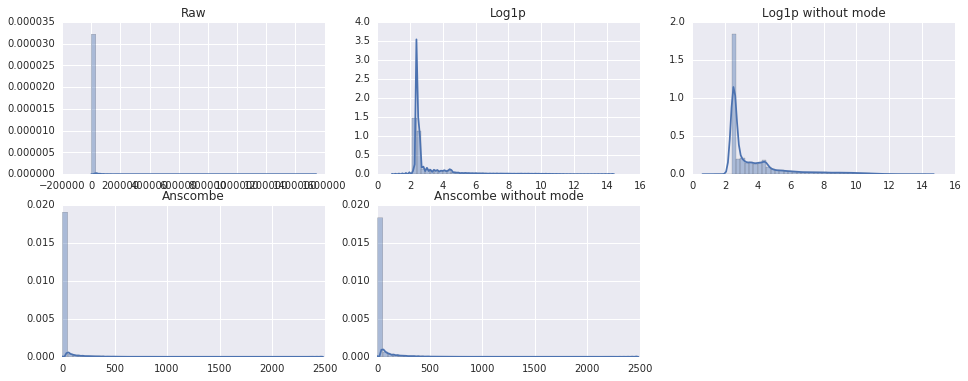

In [135]:
# plot distributions
from math import log1p, sqrt
sns.set("notebook")
plt.figure(figsize=(16, 6))
sa = train_data['var5 average balance hace3']
mode=tools.mode_sa(sa)

plt.subplot(2, 3, 1)
plt.title('Raw')
sns.distplot(sa)

plt.subplot(2, 3, 2)
plt.title('Log1p')
sns.distplot(sa.apply(lambda x: log1p(x+10)))

plt.subplot(2, 3, 3)
plt.title('Log1p without mode')
sns.distplot(sa.filter(lambda x: x != mode).apply(lambda x: log1p(x+10)))

plt.subplot(2, 3, 4)
plt.title('Anscombe')
sns.distplot(sa.apply(lambda x: 2*sqrt(x+10 +3/8.0)))

plt.subplot(2, 3, 5)
plt.title('Anscombe without mode')
sns.distplot(sa.filter(lambda x: x != mode).apply(lambda x: 2*sqrt(x+10 +3/8.0)))

## ID
- Roughly uniformly distributed.
- Wonder if there is time information in this.

In [93]:
train_data['ID'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     76020     |   Yes    |
|        Min         |      1.0      |   Yes    |
|        Max         |    151838.0   |   Yes    |
|        Mean        | 75964.0507235 |   Yes    |
|        Sum         |  5774787136.0 |   Yes    |
|      Variance      | 1916833701.15 |   Yes    |
| Standard Deviation | 43781.6594152 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |     76436     |    No    |
+--------------------+---------------+----------+

Most frequent items:
 -- All elements appear with less than 0.01% frequency -- 

Quantiles: 
+-----+--------+--------+---------+---------+----------+----------+----------+
|  0% |   1%   |   5%   |   25%   |   50%   |   75%    |   95%    |   99%    |
+-----+--------+--------+---------+---------+----------+----------+----------+
| 1.0 | 1515.0 | 7

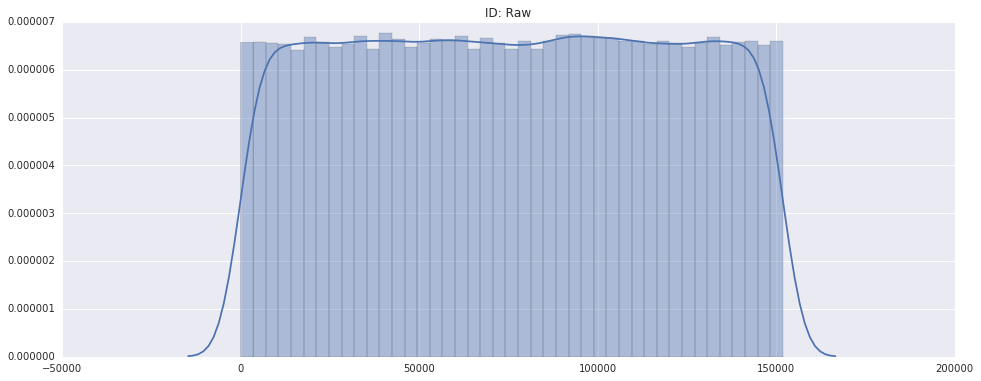

In [95]:
# plot distributions
from math import log1p
sns.set("notebook")
plt.figure(figsize=(16, 6))
sa = train_data['ID']
plt.title('ID: Raw')
sns.distplot(sa)

In [98]:
train_data['ID'].tail()

dtype: int
Rows: 10
[151816, 151818, 151820, 151821, 151825, 151829, 151830, 151835, 151836, 151838]

# Feature Engineering
- Drop ID
- transform var38 and var15 by log1p and Anscombe
- did not improve the score

In [152]:
train_data, test_data = initialise.load_data(reload_data=False)
#train_data.remove_column('ID');

def anscombe(x): 
    return 2*sqrt(x +3/8.0)

for col in ['var38', 'var15']:
    for table in [train_data, test_data]:
        table['log1p '+ col]   = table[col].apply(log1p)
        table['Anscombe '+col] = table[col].apply(anscombe)

Loading saved processed data
306  features in total


WARNING: Detected extremely low variance for feature(s) 'var33 delta transfer amount out 1Y3', 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 310

Number of unpacked features : 310

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.240681     | 0.810702     | 0.807108       |

| 2         | 0.438804     | 0.821372     | 0.810500       |

| 3         | 0.618131     | 0.817519     | 0.806551       |

| 4         | 0.818510     | 0.830865     | 0.821848       |

| 5         | 0.998731     | 0.829908     | 0.820615       |

| 6         | 1.183559     | 0.836013     | 0.827780       |

| 10        | 1.931531     | 0.843770     | 0.836645       |

| 11        | 2.123342     | 0.844786     | 0.837333       |

| 20        | 3.850741     | 0.850163     | 0.841201       |

| 30        | 5.747698     | 0.854674     | 0.842686       |

| 40        | 7.636460     | 0.859398     | 0.843869       |

| 50        | 9.508741     | 0.863191     | 0.844006       |

| 51        | 9.686640     | 0.863423     | 0.844108       |

| 60        | 11.404593    | 0.865346     | 0.844286       |

| 70        | 13.299607    | 0.867294     | 0.843883       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 57

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  146  |
|      1       |        1        |  479  |
|      0       |        1        |  3204 |
|      0       |        0        | 11623 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


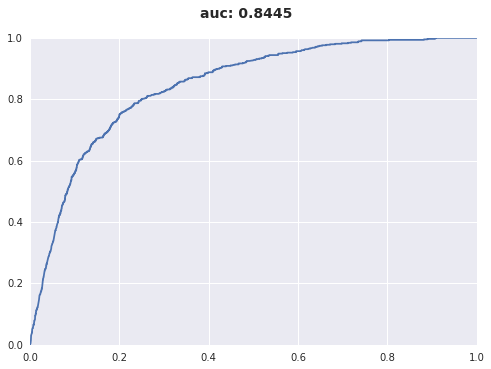

In [153]:
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

In [154]:
model.get_feature_importance()

name,index,count
var15,None,79
var38,None,53
var30 balance,None,52
var5 average balancehace3 ...,None,46
ID,None,37
log1p var38,None,34
var5 average balancehace2 ...,None,33
var5 average balanceultima3 ...,None,32
log1p var15,None,22
var5 average balanceultima1 ...,None,22


In [158]:
train_data.remove_column('ID');

WARNING: Detected extremely low variance for feature(s) 'var33 delta transfer amount out 1Y3', 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 305

Number of unpacked features : 305

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.227895     | 0.752560     | 0.743029       |

| 2         | 0.407213     | 0.825205     | 0.820259       |

| 3         | 0.602295     | 0.821486     | 0.817632       |

| 4         | 0.783402     | 0.830902     | 0.826800       |

| 5         | 0.963609     | 0.830838     | 0.824406       |

| 6         | 1.143666     | 0.837121     | 0.830893       |

| 10        | 1.883857     | 0.843834     | 0.836464       |

| 11        | 2.071592     | 0.843855     | 0.835703       |

| 20        | 3.709062     | 0.851743     | 0.839700       |

| 30        | 5.505115     | 0.856475     | 0.842406       |

| 40        | 7.337680     | 0.860226     | 0.844148       |

| 50        | 9.181532     | 0.863219     | 0.844477       |

| 51        | 9.366110     | 0.863385     | 0.844483       |

| 60        | 11.019874    | 0.866003     | 0.844952       |

| 70        | 12.902126    | 0.867747     | 0.845620       |

| 80        | 14.960075    | 0.869289     | 0.845411       |

| 90        | 16.753479    | 0.870713     | 0.845681       |

| 100       | 18.528755    | 0.871967     | 0.845705       |

| 101       | 18.712191    | 0.872082     | 0.845621       |

| 110       | 20.338022    | 0.873769     | 0.845614       |

| 120       | 22.149221    | 0.875530     | 0.845861       |

| 130       | 23.982559    | 0.876935     | 0.846025       |

| 140       | 25.768224    | 0.877970     | 0.846222       |

| 150       | 27.567934    | 0.879447     | 0.846307       |

| 160       | 29.371914    | 0.880351     | 0.846296       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 144

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  154  |
|      1       |        1        |  471  |
|      0       |        1        |  3125 |
|      0       |        0        | 11702 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


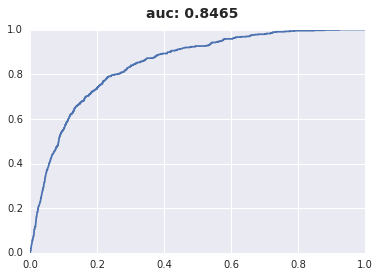

In [159]:
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

In [160]:
model.get_feature_importance()

name,index,count
var38,None,178
var15,None,160
var5 average balancehace3 ...,None,82
var5 average balancehace2 ...,None,70
var5 average balanceultima3 ...,None,69
var30 balance,None,65
var42 balance,None,63
var5 balance,None,43
var5 average balanceultima1 ...,None,41
var22 number ultima3,None,40


In [162]:
train_data.remove_columns(['var38', 'var15']);

KeyError: 'Cannot find column var38'

WARNING: Detected extremely low variance for feature(s) 'var33 delta transfer amount out 1Y3', 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 303

Number of unpacked features : 303

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.228734     | 0.737335     | 0.726938       |

| 2         | 0.402910     | 0.748234     | 0.737234       |

| 3         | 0.579296     | 0.754961     | 0.750056       |

| 4         | 0.758989     | 0.762364     | 0.757278       |

| 5         | 0.937024     | 0.762270     | 0.756596       |

| 6         | 1.114503     | 0.765402     | 0.761235       |

| 10        | 1.807201     | 0.767178     | 0.759662       |

| 11        | 1.986598     | 0.768553     | 0.759320       |

| 20        | 3.603242     | 0.776836     | 0.764854       |

| 30        | 5.380247     | 0.784938     | 0.770815       |

| 40        | 7.171446     | 0.791284     | 0.774188       |

| 50        | 8.968205     | 0.794647     | 0.775001       |

| 51        | 9.149527     | 0.794920     | 0.774898       |

| 60        | 10.743312    | 0.797462     | 0.775522       |

| 70        | 12.523296    | 0.800296     | 0.775893       |

| 80        | 14.287308    | 0.803089     | 0.775201       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 67

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  155  |
|      1       |        1        |  470  |
|      0       |        1        |  4422 |
|      0       |        0        | 10405 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


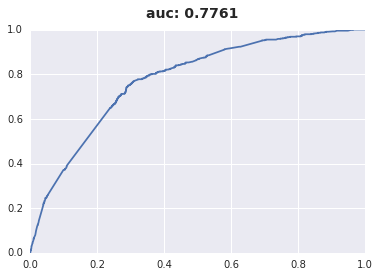

In [163]:
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

WARNING: Detected extremely low variance for feature(s) 'var33 delta transfer amount out 1Y3', 'var33 transfer amount out ultima1', 'var33 number transfer out ultima1' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 60568

Number of classes           : 2

Number of feature columns   : 307

Number of unpacked features : 307

+-----------+--------------+--------------+----------------+

| Iteration | Elapsed Time | Training-auc | Validation-auc |

+-----------+--------------+--------------+----------------+

| 1         | 0.306956     | 0.819108     | 0.819103       |

| 2         | 0.552109     | 0.823727     | 0.818223       |

| 3         | 0.778597     | 0.815650     | 0.808302       |

| 4         | 1.025718     | 0.831651     | 0.824937       |

| 5         | 1.261036     | 0.828517     | 0.821334       |

| 6         | 1.500962     | 0.826331     | 0.818164       |

| 10        | 2.469290     | 0.841585     | 0.833240       |

| 11        | 2.705588     | 0.841421     | 0.832099       |

| 15        | 3.642410     | 0.845592     | 0.837224       |

| 20        | 4.827000     | 0.850355     | 0.841114       |

| 25        | 6.016787     | 0.852030     | 0.840369       |

| 30        | 7.203936     | 0.855548     | 0.841837       |

| 35        | 8.389579     | 0.858109     | 0.843551       |

| 40        | 9.594557     | 0.860462     | 0.843643       |

| 45        | 10.793925    | 0.862393     | 0.844018       |

| 50        | 11.996734    | 0.864185     | 0.844193       |

| 51        | 12.232344    | 0.864520     | 0.844218       |

| 55        | 13.175273    | 0.865696     | 0.844300       |

| 60        | 14.365465    | 0.866810     | 0.844929       |

| 65        | 15.558169    | 0.867893     | 0.844989       |

| 70        | 16.762363    | 0.869180     | 0.844855       |

| 75        | 17.945830    | 0.869827     | 0.844832       |

| 80        | 19.124641    | 0.870733     | 0.844963       |

+-----------+--------------+--------------+----------------+

Early stop triggered. Returning the best model at iteration: 63

{'confusion_matrix': Columns:
	target_label	int
	predicted_label	int
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        0        |  150  |
|      1       |        1        |  475  |
|      0       |        1        |  3230 |
|      0       |        0        | 11597 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


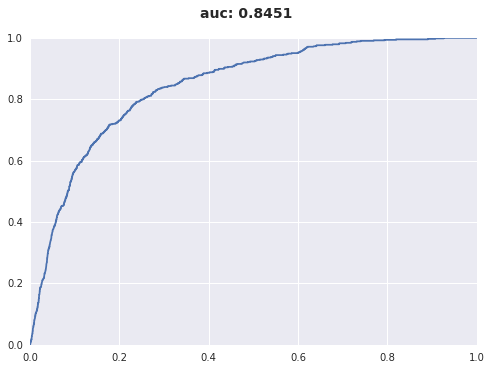

In [10]:
mode_var38=tools.mode_sa(train_data['var38'])
train_data['var38_ind'] = train_data['var38'].apply(lambda x: x == mode_var38)

train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':True, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

In [11]:
model.get_feature_importance()


name,index,count
var15,None,91
var38,None,86
var5 average balancehace3 ...,None,57
var30 balance,None,56
var5 average balancehace2 ...,None,51
ID,None,45
var5 average balanceultima1 ...,None,32
var42 balance,None,30
var5 average balanceultima3 ...,None,27
var22 number ultima1,None,26


## Remove Correlated columns

In [4]:
reload(tools)
import itertools
float_cols = tools.features_type(float(), train_data)
pairs = itertools.combinations(float_cols, 2)

correlated_float_cols = [(col2,col1) for col1, col2, in pairs if abs(tools.pearsonr_sa(train_data[col1], train_data[col2])) > 0.99]
print correlated_float_cols 

[('var41 option amount ultima1', 'var39 option amount ultima1'), ('var24 balance', 'var12 balance'), ('var17 average balance ultima1', 'var17 average balance ultima3'), ('var17 balance', 'var17 average balance ultima3'), ('var17 balance', 'var17 average balance ultima1')]


In [5]:
int_cols = tools.features_type(int(), train_data)
pairs = itertools.combinations(int_cols, 2)

correlated_int_cols = [(col2,col1) for col1, col2, in pairs if abs(tools.pearsonr_sa(train_data[col1], train_data[col2])) > 0.99]
print correlated_int_cols 

[('var41 option number hace2', 'var39 option number hace2'), ('var17 reimbursement number hace3', 'var17 refund amount hace3'), ('var40 number 0', 'var1 number 0'), ('var17 average balance hace3', 'var17 input amount hace3'), ('var17 transfer number in hace3', 'var17 transfer amount in hace3'), ('var18 balance', 'var18 repayment amount ultima1'), ('var13 balance means', 'var13 average balance means ultima3'), ('var13 average number 0', 'var13 number months average number ultima3'), ('var45 number ultima3', 'var45 average number ultima3'), ('var1 number', 'var40 number'), ('var41 amount effective option ultima1', 'var39 amount effective option ultima1'), ('var41 amount effective option ultima3', 'var39 amount effective option ultima3'), ('var33 reimbursement number ultima1', 'var33 refund amount ultima1'), ('var39 option number cash ultima3', 'var41 option number cash ultima3'), ('var33 number transfer out ultima1', 'var33 transfer amount out ultima1'), ('var33 average balance ultima1',

In [6]:
str_cols = tools.features_type(str(), train_data)
pairs = itertools.combinations(str_cols, 2)
correlated_str_cols = [(col2,col1) for col1, col2, in pairs if all(train_data[col1] == train_data[col2])]
print correlated_str_cols 

[]


In [15]:
drop_list = sorted(list(set(zip(*correlated_float_cols)[0] + zip(*correlated_int_cols)[0])))
print len(drop_list)
print drop_list

22
['var1 number', 'var13 average number 0', 'var13 balance means', 'var17 average balance hace3', 'var17 average balance ultima1', 'var17 balance', 'var17 reimbursement number hace3', 'var17 transfer number in hace3', 'var18 balance', 'var24 balance', 'var33 average balance ultima1', 'var33 balance', 'var33 number transfer out ultima1', 'var33 reimbursement number ultima1', 'var39 option number cash ultima3', 'var40 number 0', 'var41 amount effective option ultima1', 'var41 amount effective option ultima3', 'var41 option amount ultima1', 'var41 option number cash ultima1', 'var41 option number hace2', 'var45 number ultima3']


In [16]:
duplicate_cols = ['var29 indicator 0', 'var29 indicator', 'var13 indicator means', 'var18 indicator', 'var26 indicator', 'var25 indicator', 'var32 indicator', 'var34 indicator', 'var37 indicator', 'var39 indicator', 'var29 number 0', 'var29 number', 'var13 average number', 'var18 number', 'var26 number', 'var25 number', 'var32 number', 'var34 number', 'var37 number', 'var39 number', 'var29 balance', 'var13 average balance means ultima1', 'var33 delta contribution amount 1Y3', 'var13 delta reimbursement amount 1Y3', 'var17 delta reimbursement amount 1Y3', 'var33 delta reimbursement amount 1Y3', 'var17 delta transfer number in 1Y3', 'var17 delta transfer number out 1Y3', 'var33 delta transfer number in 1Y3', 'var33 delta transfer number out 1Y3']



In [17]:
print len(drop_list), len(duplicate_cols)

22 30


In [18]:
set(drop_list) & set(duplicate_cols)

set()

In [19]:
train_data, test_data = initialise.load_data(reload_data=True)

Loading raw data and tranforming it
Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
306 features in total
Saving processed data for fast reloading


In [20]:
reload(initialise)
train_data, test_data = initialise.load_data(reload_data=True)

Loading raw data and tranforming it
Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
86 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
284 features in total
Saving processed data for fast reloading


{'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|  Satisified  |   Unsatisified  |  148  |
|  Satisified  |    Satisified   |  477  |
| Unsatisified |    Satisified   |  3272 |
| Unsatisified |   Unsatisified  | 11555 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


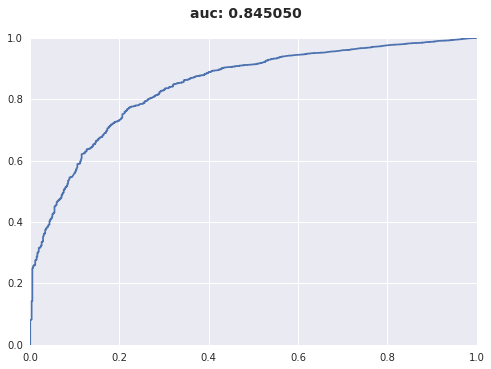

In [29]:
reload(tools)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);

Loading raw data and tranforming it
Loading raw data from CSV files
train: 76020    test: 75818
370 raw features
366 Columns translated to English
64 constant or duplicate columns removed
19 features with anomalous values replaced by 'None'
73 integer features converted to categorical
306 features in total
Saving processed data for fast reloading
{'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|  Satisified  |   Unsatisified  |  142  |
|  Satisified  |    Satisified   |  483  |
| Unsatisified |    Satisified   |  3286 |
| Unsatisified |   Unsatisified  | 11541 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
}


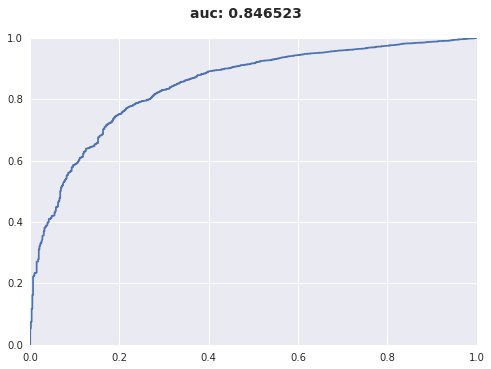

In [32]:
reload(initialise)#after removing low_variance_cols
train_data, test_data = initialise.load_data(reload_data=True)
train, validate = train_data.random_split(0.8, seed=8273)
params = {'target':'TARGET', 'validation_set':validate,'verbose':False, 'random_seed':8923,
          'class_weights':'auto','metric':'auc',
          'early_stopping_rounds':20, 'max_iterations':300}
d=4; r=1; c=0.6; s=0.1;
model = gl.boosted_trees_classifier.create(train, 
                    max_depth=d, row_subsample=r, column_subsample=c, 
                                           step_size=s, **params)
print model.evaluate(validate, metric='confusion_matrix')
tools.plot_roc(model, validate);